# WeRateDogs: Wrangling and Analyze Data
## By: Jaclyn Tobin

## Data Gathering



In [ ]:
# download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
import pandas as pd

archive= pd.read_csv('twitter-archive-enhanced.csv')

archive.head()

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r.status_code

200

In [3]:
breeds = pd.read_csv("image-predictions.tsv", sep='\t')
breeds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [ ]:
import json
selected_attr = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets','timestamp'])

tweet_selected_attr

In [93]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id     2327 non-null int64
favorites    2327 non-null int64
retweets     2327 non-null int64
timestamp    2327 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Assessing Data

### Tidiness issues
1. Three different datasets exist about one observational unit, tweets. Therefore, these three datasets should be merged as they are part of the same observational unit. I will used pandas join to combine these datasets with tweet_id as the key.



2. There is no column for the day of the week the tweet was created. Create a new column 'day' with the day of the week the tweet was created. Extract this from 'timestamp' column. This will provide to be much more useful in our analysis than just the 'timestamp' column. 

### Quality issues
1. There are dupicate tweets and null values. Drop all duplicate tweets by eliminating rows with non-null values in retweeted_status_id and in_reply_to_status_id. Values in these columns indicate the tweet is a retweet or a reply. By removing these from the dataset, we can be sure we are looking at only original tweets. 


2. There are entries other than dog breeds in 'p1' (dog breed predictions).  Remove tweets that do not have a dog image. There are many everyday objects like 'tennis_ball' and 'door_mat' in the column of dog breed predictions. Create a list of all the non-dog strings and remove those entries from the 'p1' column. 


3. 'in_reply_to_user_id' and 'in_reply_to_tweet_id' are not original tweets. So should be removed as quality issue itself. However, for retweets and replies a single tag of quality issue should be made: Dropping non-original tweets.¶



4. 'timestamp' column is not in correct datatype.  Change datatype for timestamp from 'object' to 'datetime' using pandas to_datetime. This will allow us to treat the timestamp as an actual time and date. From there this data can be useful in our analysis.



5. 'favorites' and 'retweets' are in an incorrect datatype. Change favorites and retweets from 'float' to 'integer'. It does not make sense to have these as a float because we cannot have a fraction or partial favorite or retweet. Integers will give a more accurate representations of these columns. 



6. Rename 'p1' column.  'p1' represents the predicted dog breed. It will make more sense to change the column name to 'dog_breed'. During our analysis the dog_breed column name will be quick to recognize and not cause confusion.



7. rating_numerator and rating_denominator are the incorrect datatype. Change rating_numerator and rating_denominator from 'integer' to 'float'. It is possible for a dog to be rated with a fraction or non-integer. To best represent their ratings we will want to convert these columns to floats. 



8. tweet_id is in an incorrect datatype. Change tweet_id from 'integer' to 'string'. The tweet_id is a unique identifier and not used as a number. It make no sense to have this column as an interger. We can best make use of tweet_id as a string (object).

## Cleaning Data


### Tidy Issue #1: Three different datasets exsist about one observational unit, tweets

#### Define: Information about one type of observational unit (tweets) is spread across three different datasets. Therefore, these three datasets should be merged as they are part of the same observational unit. I will used pandas join to combine these datasets with tweet_id as the key.

#### Code

In [7]:
# Make copies of original pieces of data
# Combine dataframes using tweet_id as the key to join columns of interest: 
# archive= text','rating_numerator', 'rating_denominator', 'name'
# tweet_selected_attributes= 'favorites', 'retweets', 'timestamp'
# breeds = p1 (breed predicition)

df=archive[['tweet_id','text','rating_numerator', 'rating_denominator', 'retweeted_status_id', 'in_reply_to_status_id']].copy()
df.head()

,tweet_id,text,rating_numerator,rating_denominator,retweeted_status_id,in_reply_to_status_id
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,NaN,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,NaN,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,NaN,NaN


In [8]:
df=df.join(tweet_selected_attr.set_index('tweet_id'), on='tweet_id')
df.head()

,tweet_id,text,rating_numerator,rating_denominator,retweeted_status_id,in_reply_to_status_id,favorites,retweets,timestamp
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,NaN,33891.0,7043.0,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,NaN,NaN,29389.0,5317.0,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,NaN,22102.0,3498.0,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,NaN,NaN,37002.0,7253.0,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,NaN,NaN,35382.0,7794.0,Sat Jul 29 16:00:24 +0000 2017


In [9]:
df2=breeds[['tweet_id','p1']].copy()
df=df.join(df2.set_index('tweet_id'), on='tweet_id')
df.head()

,tweet_id,text,rating_numerator,rating_denominator,retweeted_status_id,in_reply_to_status_id,favorites,retweets,timestamp,p1
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,NaN,33891.0,7043.0,Tue Aug 01 16:23:56 +0000 2017,orange
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,NaN,NaN,29389.0,5317.0,Tue Aug 01 00:17:27 +0000 2017,Chihuahua
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,NaN,22102.0,3498.0,Mon Jul 31 00:18:03 +0000 2017,Chihuahua
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,NaN,NaN,37002.0,7253.0,Sun Jul 30 15:58:51 +0000 2017,paper_towel
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,NaN,NaN,35382.0,7794.0,Sat Jul 29 16:00:24 +0000 2017,basset


#### Test

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2356 non-null int64
text                     2356 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
retweeted_status_id      181 non-null float64
in_reply_to_status_id    78 non-null float64
favorites                2327 non-null float64
retweets                 2327 non-null float64
timestamp                2327 non-null object
p1                       2075 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 184.1+ KB


### Tidy Issue #2: There is no column for the day of the week the tweet was created

#### Define:  Create a new column 'day' with the day of the week the tweet was created. Extract this from 'timestamp' column. This will provide to be much more useful in our analysis than just the 'timestamp' column. 

#### Code ** This code will follow the cleaning of the datatype issues so the day can be properly extracted **

### Tidy Issue #2: There is no column for the day of the week the tweet was created

#### Define:  Create a new column 'day' with the day of the week the tweet was created. Extract this from 'timestamp' column. This will provide to be much more useful in our analysis than just the 'timestamp' column. 

#### Code

In [128]:
#separate column for day of week
df['day']=df['timestamp'].dt.day_name()

#### Test

In [129]:
df.head()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,timestamp,dog_breed,day
2,891815181378084864,12.0,10.0,22102,3498,2017-07-31 00:18:03,Chihuahua,Monday
4,891327558926688256,12.0,10.0,35382,7794,2017-07-29 16:00:24,basset,Saturday
5,891087950875897856,13.0,10.0,17849,2612,2017-07-29 00:08:17,Chesapeake_Bay_retriever,Saturday
7,890729181411237888,13.0,10.0,56955,15817,2017-07-28 00:22:40,Pomeranian,Friday
8,890609185150312448,13.0,10.0,24567,3638,2017-07-27 16:25:51,Irish_terrier,Thursday


### Issue #1: There are dupicate tweets and null values

#### Define: Drop all duplicate tweets by eliminating rows with non-null values in retweeted_status_id and in_reply_to_status_id. Values in these columns indicate the tweet is a retweet or a reply. By removing these fromt the dataset, we can be sure we are looking at only original tweets. 

#### Code

In [11]:
#Number of retweeted rows
df.retweeted_status_id.count()

181

In [12]:
#Number of reply tweets
df.in_reply_to_status_id.count()

78

In [13]:
df=df[df['retweeted_status_id'].isna()]
df=df[df['in_reply_to_status_id'].isna()]

#### Test

In [14]:
print("Number of retweeted rows =" , df.retweeted_status_id.count())
print("Number of reply tweets=", df.in_reply_to_status_id.count())

Number of retweeted rows = 0
Number of reply tweets= 0


### Issue #2: There are entries other than dog breeds in 'p1' (dog breed predictions)

#### Define: Remove tweets that do not have a dog image. There are many everyday objects like 'tennis_ball' and 'door_mat' in the column of dog breed predictions. Create a list of all the non-dog strings and remove those entries from the 'p1' column. 

#### Code

In [ ]:
#Explore the values in p1 (dog image prediciton)
pd.set_option("display.max_rows", None)
df.p1.value_counts()

In [ ]:
list=df['p1'].value_counts().index.tolist()
list

In [17]:
#Create a list of all not dog image predictions
not_dogs = ['dingo',
 'tennis_ball',
 'doormat',
 'hamster',
 'bath_towel',
 'swing',
 'Siamese_cat',
 'tub',
 'llama',
 'redbone',
 'ice_bear',
 'car_mirror',
 'home_theater',
 'porcupine',
 'shopping_cart',
 'hippopotamus',
 'ox',
 'minivan',
 'brown_bear',
 'guinea_pig',
 'wombat',
 'hog',
 'bathtub',
 'jigsaw_puzzle',
 'barrow',
 'patio',
 'bow_tie',
 'goose',
 'Arctic_fox',
 'triceratops',
 'muzzle',
 'mousetrap',
 'ski_mask',
 'seashore',
 'washbasin',
 'stone_wall',
 'Arabian_camel',
 'cairn',
 'comic_book',
 'briard',
 'dishwasher',
 'komondor',
 'balloon',
 'space_heater',
 'cowboy_hat',
 "jack-o'-lantern",
 'vacuum',
 'prison',
 'sea_lion',
 'common_iguana',
 'wood_rabbit',
 'toilet_tissue',
 'Christmas_stocking',
 'window_shade',
 'motor_scooter',
 'white_wolf',
 'Brabacon_griffon',
 'ram',
 'refrigerator',
 'Angora',
 'gas_pump',
 'dough',
 'frilled_lizard',
 'bubble',
 'bustard',
 'box_turtle',
 'meerkat',
 'acorn_squash',
 'hermit_crab',
 'cash_machine',
 'jellyfish',
 'birdhouse',
 'feather_boa',
 'badger',
 'dogsled',
 'gondola',
 'paddle',
 'paper_towel',
 'toyshop',
 'Appenzeller',
 'leatherback_turtle',
 'hyena',
 'Loafer',
 'wool',
 'upright',
 'geyser',
 'shower_curtain',
 'snorkel',
 'tabby',
 'koala',
 'wallaby',
 'axolotl',
 'chimpanzee',
 'toy_terrier',
 'weasel',
 'laptop',
 'ostrich',
 'sorrel',
 'hen',
 'lakeside',
 'snail',
 'street_sign',
 'tusker',
 'cheetah',
 'pot',
 'hummingbird',
 'coral_reef',
 'park_bench',
 'cup',
 'timber_wolf',
 'ocarina',
 'radio_telescope',
 'polecat',
 'crash_helmet',
 'bonnet',
 'coffee_mug',
 'Egyptian_cat',
 'espresso',
 'peacock',
 'ping-pong_ball',
 'pillow',
 'rotisserie',
 'bannister',
 'skunk',
 'nail',
 'beaver',
 'lorikeet',
 'tricycle',
 'damselfly',
 'prayer_rug',
 'carousel',
 'African_crocodile',
 'candle',
 'tailed_frog',
 'black-footed_ferret',
 'fountain',
 'ibex',
 'banana',
 'snowmobile',
 'book_jacket',
 'cliff',
 'killer_whale',
 'orange',
 'washer',
 'handkerchief',
 'loupe',
 'robin',
 'wild_boar',
 'terrapin',
 'earthstar',
 'cheeseburger',
 'carton',
 'swab',
 'ice_lolly',
 'walking_stick',
 'wooden_spoon',
 'scorpion',
 'silky_terrier',
 'bison',
 'traffic_light',
 'leopard',
 'alp',
 'toilet_seat',
 'tiger_shark',
 'piggy_bank',
 'leaf_beetle',
 'bighorn',
 'sundial',
 'mud_turtle',
 'beach_wagon',
 'lacewing',
 'bookshop',
 'harp',
 'hand_blower',
 'jersey',
 'long-horned_beetle',
 'studio_couch',
 'hammer',
 'bearskin',
 'binoculars',
 'bee_eater',
 'padlock',
 'soccer_ball',
 'hotdog',
 'pole',
 'hay',
 'lion',
 'bow',
 'three-toed_sloth',
 'grey_fox',
 'maillot',
 'Scotch_terrier',
 'desktop_computer',
 'hare',
 'clumber',
 'mortarboard',
 'guenon',
 'groenendael',
 'bookcase',
 'rain_barrel',
 'shopping_basket',
 'grille',
 'restaurant',
 'platypus',
 'boathouse',
 'cougar',
 'coil',
 'bakery',
 'pedestal',
 'zebra',
 'clog',
 'Madagascar_cat',
 'shield',
 'coho',
 'otter',
 'dhole',
 'school_bus',
 'sunglasses',
 'African_grey',
 'four-poster',
 'barbell',
 'lynx',
 'quilt',
 'syringe',
 'EntleBucher',
 'king_penguin',
 'starfish',
 'maze',
 'convertible',
 'pencil_box',
 'teapot',
 'suit',
 'dining_table',
 'electric_fan',
 'lawn_mower',
 'remote_control',
 'revolver',
 'trombone',
 'American_black_bear',
 'marmot',
 'crane',
 'fiddler_crab',
 'bib',
 'microwave',
 'sulphur-crested_cockatoo',
 'sliding_door',
 'cowboy_boot',
 'canoe',
 'water_bottle',
 'cuirass',
 'rapeseed',
 'military_uniform',
 'panpipe',
 'limousine',
 'giant_panda',
 'sandbar',
 'conch',
 'microphone',
 'flamingo',
 'mailbox',
 'china_cabinet',
 'minibus',
 'pool_table',
 'bald_eagle',
 'slug',
 'sea_urchin',
 'picket_fence',
 'agama',
 'stove',
 'envelope',
 'pitcher',
 'water_buffalo',
 'fire_engine',
 'basketball', 'tick', 'seat_belt','web_site']


In [18]:
#Remove all rows with image predictions that are not dogs
df = df[~df.p1.str.contains('|'.join(not_dogs),na= False)]

#### Test

In [19]:
#Check to be all image predictions are of dogs
df.p1.value_counts()

golden_retriever                  137
Labrador_retriever                 94
Pembroke                           88
Chihuahua                          78
pug                                54
chow                               41
Samoyed                            40
Pomeranian                         38
toy_poodle                         37
malamute                           29
cocker_spaniel                     27
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 21
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          19
Eskimo_dog                         18
Shetland_sheepdog                  18
Maltese_dog                        18
beagle                             17
Shih-Tzu                           17
Cardigan                           17
teddy                              17
Italian_greyhound                  16
Rottweiler                         16
Lakeland_ter

### Issue #3: Drop all null values in this dataframe

#### Define: Remove rows with null values so we can have a complete dataframe. By elimnating rows with incomplete data we can more accurately assess the data. This will also allow us to correct datatypyes without null or na being a problem. 

#### Code

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 1 to 2355
Data columns (total 7 columns):
tweet_id              1433 non-null int64
rating_numerator      1433 non-null int64
rating_denominator    1433 non-null int64
favorites             1433 non-null int64
retweets              1433 non-null int64
timestamp             1433 non-null datetime64[ns]
p1                    1433 non-null object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 89.6+ KB


In [30]:
df=df[['tweet_id', 'rating_numerator', 'rating_denominator', 'favorites', 'retweets', 'timestamp', 'p1']]
df.dropna(inplace= True)

#### Test

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 1 to 2355
Data columns (total 7 columns):
tweet_id              1433 non-null int64
rating_numerator      1433 non-null int64
rating_denominator    1433 non-null int64
favorites             1433 non-null int64
retweets              1433 non-null int64
timestamp             1433 non-null datetime64[ns]
p1                    1433 non-null object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 89.6+ KB


### Issue #4: 'timestamp' column is not in correct datatype

#### Define:   Change datatype for timestamp from 'object' to 'datetime' using pandas to_datetime. This will allow us to treat the timestamp as an actual time and date. From there this data can be useful in our analysis.

#### Code

In [32]:
#Change timestamp to date time
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [24]:
df.dtypes

tweet_id                       int64
rating_numerator               int64
rating_denominator             int64
favorites                    float64
retweets                     float64
timestamp             datetime64[ns]
p1                            object
dtype: object

### Issue #5: 'favorites' and 'retweets' are in an incorrect datatype

#### Define:  Change favorites and retweets from 'float' to 'integer'. It does not make sense to have these as a float because we cannot have a fraction or partial favorite or retweet. Integers will give a more accurate representations of these columns. 

#### Code

In [25]:
df['favorites'] = df['favorites'].astype(int)
df['retweets'] = df['retweets'].astype(int)

#### Test

In [26]:
df.favorites.describe()

count      1433.000000
mean       8079.458479
std       11770.493505
min          66.000000
25%        1832.000000
50%        3806.000000
75%       10063.000000
max      145210.000000
Name: favorites, dtype: float64

In [27]:
df.retweets.describe()

count     1433.000000
mean      2278.655269
std       4144.396478
min         11.000000
25%        524.000000
50%       1154.000000
75%       2639.000000
max      71024.000000
Name: retweets, dtype: float64

### Issue #6: Change 'p1' column name

#### Define:  'p1' represents the predicted dog breed. It will make more sense to change the column name to 'dog_breed'. During our analysis the dog_breed column name will be quick to recognize and not cause confusion. 

#### Code

In [126]:
df.rename(columns={'p1':'dog_breed'}, inplace=True)

#### Test

In [127]:
df.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'favorites',
       'retweets', 'timestamp', 'dog_breed'],
      dtype='object')

### Issue #7: rating_numerator and rating_denominator are the incorrect datatype

#### Define:  Change rating_numerator and rating_denominator from 'integer' to 'float'. It is possible for a dog to be rated with a fraction or non-integer. To best represent their ratings we will want to convert these columns to floats. 

#### Code

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 2 to 2355
Data columns (total 7 columns):
tweet_id              1432 non-null int64
rating_numerator      1432 non-null int64
rating_denominator    1432 non-null int64
favorites             1432 non-null int64
retweets              1432 non-null int64
timestamp             1432 non-null datetime64[ns]
p1                    1432 non-null object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 89.5+ KB


In [122]:
df[['rating_numerator', 'rating_denominator']]=df[['rating_numerator', 'rating_denominator']].astype(float)

#### Test

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 2 to 2355
Data columns (total 7 columns):
tweet_id              1432 non-null int64
rating_numerator      1432 non-null float64
rating_denominator    1432 non-null float64
favorites             1432 non-null int64
retweets              1432 non-null int64
timestamp             1432 non-null datetime64[ns]
p1                    1432 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 89.5+ KB


### Issue #8: tweet_id is in an incorrect datatype

#### Define:  Change tweet_id from 'integer' to 'string'. The tweet_id is a unique identifier and not used as a number. It make no sense to have this column as an interger. We can best make use of tweet_id as a string (object).

#### Code

In [124]:
df[['tweet_id']]=df[['tweet_id']].astype(str)

#### Test

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 2 to 2355
Data columns (total 7 columns):
tweet_id              1432 non-null object
rating_numerator      1432 non-null float64
rating_denominator    1432 non-null float64
favorites             1432 non-null int64
retweets              1432 non-null int64
timestamp             1432 non-null datetime64[ns]
p1                    1432 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 89.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [130]:
df.to_csv("twitter_archive_master.csv", index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [131]:
# Top 5 dogs by number of tweets
breed_plot=df['dog_breed'].value_counts().nlargest(5)
breed_plot

golden_retriever      137
Labrador_retriever     91
Pembroke               88
Chihuahua              77
pug                    54
Name: dog_breed, dtype: int64

In [132]:
# Order of days with the most favorites 
fav_day=df['favorites'].groupby(df['day']).sum().nlargest(7)
fav_day

day
Wednesday    1849680
Monday       1764337
Saturday     1645154
Tuesday      1615882
Friday       1611338
Thursday     1604545
Sunday       1457539
Name: favorites, dtype: int64

In [133]:
# Order of days with the most retweets
retweet_day=df['retweets'].groupby(df['day']).sum().nlargest(7)
retweet_day

day
Wednesday    524938
Saturday     505445
Monday       485593
Tuesday      449670
Friday       449420
Thursday     436552
Sunday       408378
Name: retweets, dtype: int64

In [134]:
# Dataframe with columns showing the average number of favorites, average number of retweets, average rating, and the number of tweets for that breed
df1=df.groupby('dog_breed').agg({"favorites":["mean","count"],"retweets":"mean","rating_numerator":"mean"}).reset_index()
df1.columns=['dog_breed','fav_avg','number_tweets','retweet_avg','rating_avg']

# Highest favorite average
df1.sort_values('fav_avg',ascending= False).head(10)

,dog_breed,fav_avg,number_tweets,retweet_avg,rating_avg
51,Saluki,20848.500000,4,4152.500000,12.500000
21,French_bulldog,16382.240000,25,3944.040000,11.240000
0,Afghan_hound,14739.000000,3,4802.666667,9.666667
79,giant_schnauzer,14701.000000,2,4144.500000,11.500000
69,black-and-tan_coonhound,14684.000000,2,3331.000000,10.500000
78,flat-coated_retriever,14551.750000,8,3748.375000,10.875000
31,Irish_water_spaniel,14006.666667,3,3632.666667,11.333333
93,standard_poodle,13659.857143,7,5438.428571,10.285714
19,English_springer,13481.111111,9,4891.888889,11.111111
13,Cardigan,13081.764706,17,3652.176471,11.529412


In [135]:
# Top 10 dogs with the highest rating average with 3 tweets or more
rating=df1[(df1.number_tweets >= 3)].sort_values('rating_avg',ascending= False).head(10)
rating

,dog_breed,fav_avg,number_tweets,retweet_avg,rating_avg
92,soft-coated_wheaten_terrier,1937.500000,10,649.800000,26.700000
95,teddy,4973.117647,17,1338.588235,18.588235
64,West_Highland_white_terrier,5606.285714,14,1260.928571,15.642857
26,Great_Pyrenees,10927.071429,14,3773.785714,14.928571
71,borzoi,5520.750000,8,1512.625000,14.625000
34,Labrador_retriever,9957.681319,91,3082.406593,14.000000
56,Siberian_husky,5994.100000,20,1379.600000,13.250000
47,Pomeranian,6978.210526,38,2302.131579,12.868421
51,Saluki,20848.500000,4,4152.500000,12.500000
80,golden_retriever,10779.000000,137,2993.459854,12.277372


In [136]:
# Top 10 dogs with the highest retweet average with 3 tweets or more
retweet=df1[(df1.number_tweets >= 3)].sort_values('retweet_avg',ascending= False).head(10)
retweet

,dog_breed,fav_avg,number_tweets,retweet_avg,rating_avg
93,standard_poodle,13659.857143,7,5438.428571,10.285714
19,English_springer,13481.111111,9,4891.888889,11.111111
0,Afghan_hound,14739.000000,3,4802.666667,9.666667
20,Eskimo_dog,12655.611111,18,4432.444444,11.777778
51,Saluki,20848.500000,4,4152.500000,12.500000
21,French_bulldog,16382.240000,25,3944.040000,11.240000
35,Lakeland_terrier,11974.466667,15,3867.000000,10.466667
26,Great_Pyrenees,10927.071429,14,3773.785714,14.928571
78,flat-coated_retriever,14551.750000,8,3748.375000,10.875000
13,Cardigan,13081.764706,17,3652.176471,11.529412


In [137]:
# Top 10 dogs with the highest favorite average with 3 tweets or more
fav=df1[(df1.number_tweets >= 3)].sort_values('fav_avg',ascending= False).head(10)
fav

,dog_breed,fav_avg,number_tweets,retweet_avg,rating_avg
51,Saluki,20848.500000,4,4152.500000,12.500000
21,French_bulldog,16382.240000,25,3944.040000,11.240000
0,Afghan_hound,14739.000000,3,4802.666667,9.666667
78,flat-coated_retriever,14551.750000,8,3748.375000,10.875000
31,Irish_water_spaniel,14006.666667,3,3632.666667,11.333333
93,standard_poodle,13659.857143,7,5438.428571,10.285714
19,English_springer,13481.111111,9,4891.888889,11.111111
13,Cardigan,13081.764706,17,3652.176471,11.529412
36,Leonberg,12684.000000,3,3100.333333,11.333333
20,Eskimo_dog,12655.611111,18,4432.444444,11.777778


### Insights:


1. The Saluki ranked highest in favorite and rating averages amoungst dog breeds that had at least 3 tweets, follwed by the French Bulldog. The Standard Poodle ranked highest in retweets, followed by the English Springer. 



2. The Golden Retriever was had the most overall tweets, 137, but was not in the top 10 of favorite and retweet averages. 



3. Tweets posted on Wednesdays had the overall highest action; the most favorites and retweets occured on Wednesdays. Sundays saw the least amount of action. 

### Visualization

In [138]:
# One df with top 10 favorite and retweet dog breeds
df2= fav.append(retweet)
df2.drop_duplicates(inplace= True)
df2

,dog_breed,fav_avg,number_tweets,retweet_avg,rating_avg
51,Saluki,20848.500000,4,4152.500000,12.500000
21,French_bulldog,16382.240000,25,3944.040000,11.240000
0,Afghan_hound,14739.000000,3,4802.666667,9.666667
78,flat-coated_retriever,14551.750000,8,3748.375000,10.875000
31,Irish_water_spaniel,14006.666667,3,3632.666667,11.333333
93,standard_poodle,13659.857143,7,5438.428571,10.285714
19,English_springer,13481.111111,9,4891.888889,11.111111
13,Cardigan,13081.764706,17,3652.176471,11.529412
36,Leonberg,12684.000000,3,3100.333333,11.333333
20,Eskimo_dog,12655.611111,18,4432.444444,11.777778


<function matplotlib.pyplot.show(*args, **kw)>

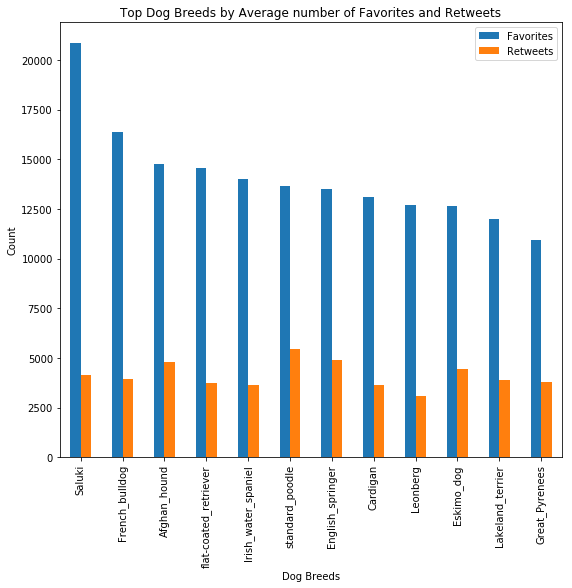

In [143]:
import matplotlib.pyplot as plt
ax=df2.plot(x="dog_breed", y=["fav_avg", "retweet_avg"], kind="bar", figsize=(9, 8))
ax.set_xlabel("Dog Breeds")
ax.set_ylabel("Count")
ax.set_title("Top Dog Breeds by Average number of Favorites and Retweets")
ax.legend(["Favorites", "Retweets"])
plt.show

Text(0,0.5,'Count of favorites')

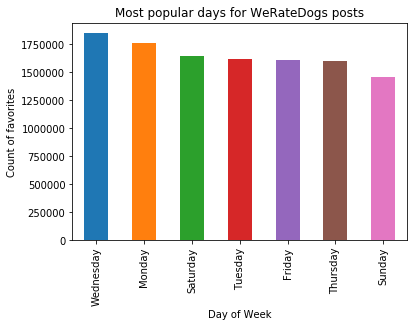

In [140]:
#Bar Graph by 'favorite' actions by day
fav_day=df['favorites'].groupby(df['day']).sum().nlargest(7)
fav_day.plot.bar(title= "Most popular days for WeRateDogs posts")
plt.xlabel('Day of Week')
plt.ylabel('Count of favorites')

# Conclusion

> After wrangling and cleaning data from WeRateDogs tweets, I am excited to share some insights
from my analysis. I was very interested in what day of the week saw the most and least activity on the
tweet. This could be measured by the overall number of favorites and retweets the occurred on each
day. As you can see from these visualizations above, the most activity for both retweets and favorites
happened on Wednesday. The least amount of activity happened on Sunday. This would suggest that is
WeRateDogs account wanted more activity on a tweet, Wednesday would be the best day to post.
Sunday WeRateDog posts would not be as likely to have high activity.

>Above is also a viz showing the top dog breeds based on their favorites and retweets. I filtered the
dataset to breeds that had at least 3 postings so no ‘one hit wonders’ snuck in the ratings. This shows
Salukis had on average the most favorites followed by the French Bulldog and Afgan Hound. The
Standard Poodles had the most retweets followed by the English Springer and Afgan Hound.

>Below you will see the 5 dog breeds that WeRateDogs tweeted about the most. The Golden
Retriever was clearly the most tweeted dog followed by the Labrador Retriever, Pembroke, Chihuahua,
and Pug. However, none of those breeds crack the top 10 in followers favorites or retweets. A
recommendation to WeRateDogs could be to tweet more Salukis, Standard Poodles, French Bulldogs,
English Springers, or Afgan Hounds if they want more action on their tweets. 


In [131]:
# Top 5 dogs by number of tweets
breed_plot=df['dog_breed'].value_counts().nlargest(5)
breed_plot

golden_retriever      137
Labrador_retriever     91
Pembroke               88
Chihuahua              77
pug                    54
Name: dog_breed, dtype: int64